## Online available

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/compmec/strct/blob/main/examples/example11.ipynb)

At [Github/compmec/strct/examples/example11.ipynb](https://github.com/compmec/strct/blob/main/examples/example11.ipynb)

# Example 11

![](https://raw.githubusercontent.com/compmec/strct/examples/examples/img/example11_prob.png)


First we import what we will use.

In [1]:
import os
os.system("pip install compmec-nurbs")
os.system("pip install compmec-strct")
from compmec.strct.element import EulerBernoulli
from compmec.strct.profile import Circle
from compmec.strct.material import Isotropic
from compmec.strct.system import StaticSystem
from compmec.strct.shower import ShowerStaticSystem
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True) # To have a clean print

Then we create the elements we will use 

In [2]:
lenght = 1000  # Lenght of each beam, mm
E = 210e+3  # Elasticity Modulus, MPa
nu = 0.3  # Poisson coefficient
steel = Isotropic(E=210e+3, nu=0.3)
circle = Circle(diameter=2)
force = 18000


In [3]:
points = [(0, 0, 0)]
parpoints = []
nbars = 10
h = lenght * np.sqrt(3)
for i in range(nbars):   # Loop through the lower triangles 
    A = (i*lenght, 0, 0)  # Lower left point
    B = ((i+1)*lenght, 0, 0)  # Lower right point
    C = ((i+0.5)*lenght, h, 0)  # Upper middle point
    points.extend([B, C])
    parpoints.append([A, B])
    parpoints.append([A, C])
    parpoints.append([C, B])
for i in range(nbars-1):  # Loop through the upper beams
    A = ((i+0.5)*lenght, h, 0)
    B = ((i+1.5)*lenght, h, 0)
    parpoints.append([A, B])
points = np.array(points)

We plot all the points on $xy$ plane to see the initial shape

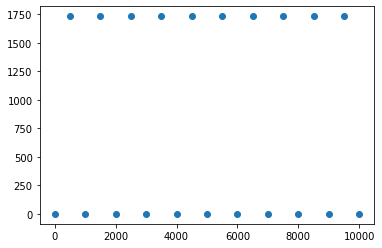

In [4]:
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y)

Once we have all the points, we create the elements and add them into the system

In [5]:
system = StaticSystem()
for A, B in parpoints:
    beam = EulerBernoulli([A, B])
    beam.section = steel, circle
    beam.path.knot_insert([0, 0.2, 0.4, 0.6, 0.8, 1])  # Discretization
    system.add_element(beam)

Now we add the force and the boundary conditions

In [6]:
A = (0, 0, 0)  # Lower left point of all structure
B = (nbars*lenght, 0, 0)  # Lower right point of all structure
C = (nbars*lenght/2, 0, 0)  # Middle point bellow
system.add_BC(A, "Ux", 0)
system.add_BC(A, "Uy", 0)
system.add_BC(A, "tx", 0)
system.add_BC(B, "Ux", 0)
system.add_BC(B, "Uy", 0)
system.add_BC(B, "tz", 0)
system.add_conc_load(C, "Fy", -force)

And now we run the simulation. As it solves a linear system, it may take time.
But for this simple example, it's very fast

In [7]:
system.run()

And then we show the results

In [8]:
shower = ShowerStaticSystem(system)

Text(0.5, 1.0, 'Deformed and undeformed shape')

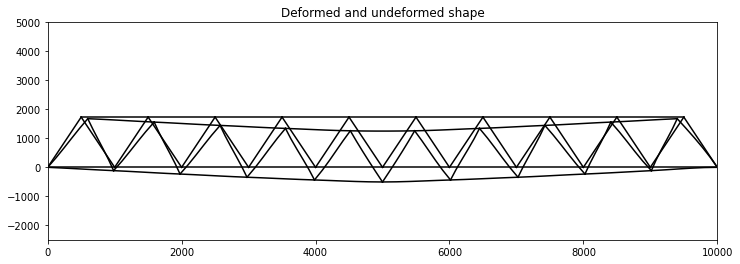

In [9]:
fig = plt.figure(figsize=(12, 4))
axes = plt.gca()
shower.plot2D("xy", deformed=True, axes=axes)
shower.plot2D("xy", deformed=False, axes=axes)
plt.xlim(0, lenght*nbars)
plt.ylim(-lenght*nbars/4, lenght*nbars/2)
plt.title("Deformed and undeformed shape")

Text(0.5, 1.0, 'Vertical displacement field $U_y$ on deformed shape')

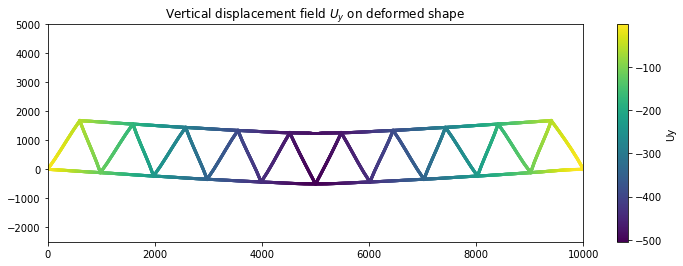

In [10]:
fig = plt.figure(figsize=(12, 4))
axes = plt.gca()
shower.plot2D("xy", fieldname = "Uy", deformed = True, axes=axes)
plt.xlim(0, lenght*nbars)
plt.ylim(-lenght*nbars/4, lenght*nbars/2)
plt.title(r"Vertical displacement field $U_y$ on deformed shape")

Text(0.5, 1.0, 'Vertical displacement field $U_y$ on undeformed shape')

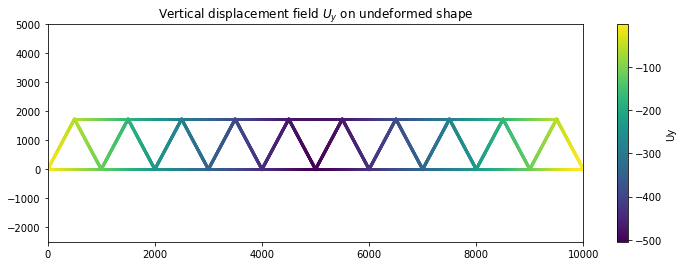

In [11]:
fig = plt.figure(figsize=(12, 4))
axes = plt.gca()
shower.plot2D("xy", fieldname = "Uy", deformed = False, axes=axes)
plt.xlim(0, lenght*nbars)
plt.ylim(-lenght*nbars/4, lenght*nbars/2)
plt.title(r"Vertical displacement field $U_y$ on undeformed shape")

Text(0.5, 1.0, 'Horizontal force field $F_x$ on undeformed shape')

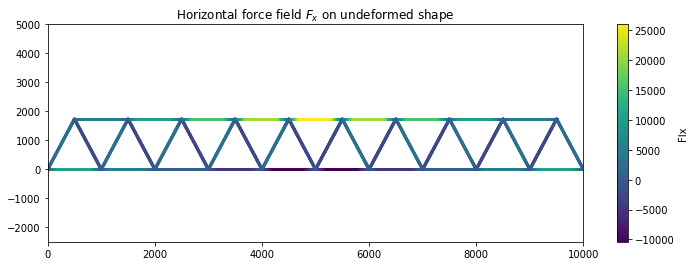

In [12]:
fig = plt.figure(figsize=(12, 4))
axes = plt.gca()
shower.plot2D("xy", fieldname = "FIx", deformed = False, axes=axes)
plt.xlim(0, lenght*nbars)
plt.ylim(-lenght*nbars/4, lenght*nbars/2)
plt.title(r"Horizontal force field $F_x$ on undeformed shape")

Text(0.5, 1.0, 'Vertical force field $F_y$ on undeformed shape')

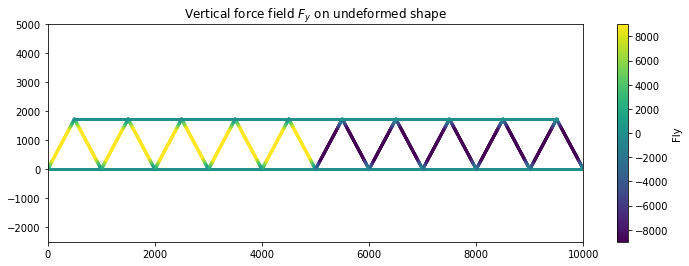

In [13]:
fig = plt.figure(figsize=(12, 4))
axes = plt.gca()
shower.plot2D("xy", fieldname = "FIy", deformed = False, axes=axes)
plt.xlim(0, lenght*nbars)
plt.ylim(-lenght*nbars/4, lenght*nbars/2)
plt.title(r"Vertical force field $F_y$ on undeformed shape")